### Importation des librairies ###

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

### Chargement du jeu de données ###

In [4]:
train_df=pd.read_csv('news_articles.csv')
train_df.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


In [14]:
# Les mensurations du dataframe 
train_df.shape

(2045, 13)

## Nettoyage et traitement des données 

In [5]:
# Encodage de la colonne label 
train_df['label'].replace('Real',1, inplace=True)
train_df['label'].replace('Fake',0, inplace=True)
train_df.dropna(inplace=True)

C:\Users\Christian Adon\AppData\Local\Temp\ipykernel_30044\3644739189.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['label'].replace('Real',1, inplace=True)
C:\Users\Christian Adon\AppData\Local\Temp\ipykernel_30044\3644739189.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [6]:
#combinaison de title,author, text_without_stopwords, language et main_img_url. Pour la formation de la colonne summary
train_df['summary'] = train_df['title']+' '+train_df['author']+' '+train_df['text_without_stopwords']+train_df['language']+train_df['main_img_url']

In [7]:
# Visualisation de la data
train_df.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage,summary
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,1.0,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0,muslims busted they stole millions in govt ben...
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,1.0,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0,re why did attorney general loretta lynch plea...
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,1.0,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0,breaking weiner cooperating with fbi on hillar...
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,1.0,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0,pin drop speech by father of daughter kidnappe...
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,1.0,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0,fantastic trumps point plan to reform healthc...


In [17]:
# Infos sur le jeu de données
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2045 entries, 0 to 2045
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   author                   2045 non-null   object 
 1   published                2045 non-null   object 
 2   title                    2045 non-null   object 
 3   text                     2045 non-null   object 
 4   language                 2045 non-null   object 
 5   site_url                 2045 non-null   object 
 6   main_img_url             2045 non-null   object 
 7   type                     2045 non-null   object 
 8   label                    2045 non-null   float64
 9   title_without_stopwords  2045 non-null   object 
 10  text_without_stopwords   2045 non-null   object 
 11  hasImage                 2045 non-null   float64
 12  summary                  2045 non-null   object 
dtypes: float64(2), object(11)
memory usage: 223.7+ KB


In [8]:
# Suppression des lignes vides de la colonne label
train_df['label'].unique()
train_df = train_df[train_df['label'] != ' ']

### Création des data test et d'entrainements

In [32]:
# Création des data d'entrainement et de test;
x=train_df['summary']
y=train_df['label']

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42, stratify=y)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [34]:
#Chargement de deux composants du modèle BERT (Bidirectional Encoder Representations from Transformers)
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [35]:
def get_sentence_embedding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

In [36]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Couches de reseaux de neurones
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Construction du model final 
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [37]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

In [39]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS,
            )

In [40]:
# Entrainement du modèle 
model_final = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
52/52 [==============================] - 505s 9s/step - loss: 0.6604 - accuracy: 0.6259 - precision: 0.4554 - recall: 0.0763
Epoch 2/10
52/52 [==============================] - 474s 9s/step - loss: 0.6687 - accuracy: 0.6100 - precision: 0.4186 - recall: 0.1493
Epoch 3/10
52/52 [==============================] - 383s 7s/step - loss: 0.6518 - accuracy: 0.6253 - precision: 0.4728 - recall: 0.1443
Epoch 4/10
52/52 [==============================] - 356s 7s/step - loss: 0.6458 - accuracy: 0.6308 - precision: 0.4974 - recall: 0.1559
Epoch 5/10
52/52 [==============================] - 252s 5s/step - loss: 0.6381 - accuracy: 0.6455 - precision: 0.5596 - recall: 0.1791
Epoch 6/10
52/52 [==============================] - 1696s 33s/step - loss: 0.6410 - accuracy: 0.6296 - precision: 0.4934 - recall: 0.1874
Epoch 7/10
52/52 [==============================] - 262s 5s/step - loss: 0.6206 - accuracy: 0.6601 - precision: 0.6044 - recall: 0.2255
Epoch 8/10
52/52 [============================

In [41]:
#Evaluation du modèle
model.evaluate(X_test, y_test)

13/13 [==============================] - 77s 6s/step - loss: 0.6014 - accuracy: 0.6675 - precision: 0.7143 - recall: 0.1656


[0.601431131362915,
 0.6674816608428955,
 0.7142857313156128,
 0.16556291282176971]

In [42]:
# Prediction et Évaluation des performances sur l'ensemble de données de test en utilisant une matrice de confusion.

y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()
y_predicted = np.where(y_predicted > 0.5, 1, 0)
cm = confusion_matrix(y_test, y_predicted)

13/13 [==============================] - 75s 6s/step


Text(50.722222222222214, 0.5, 'Truth')

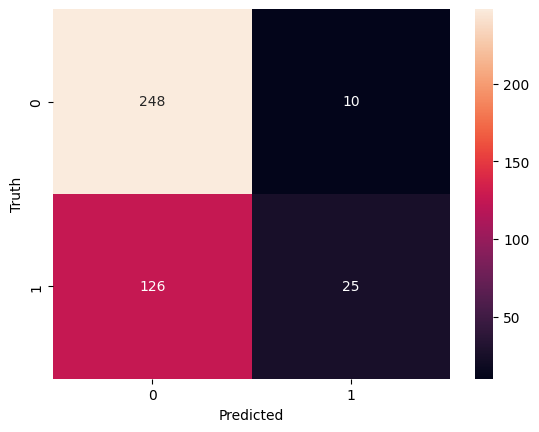

In [43]:
# Visualisation de la matrice de confusion 
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth') 

In [44]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.66      0.96      0.78       258
           1       0.71      0.17      0.27       151

    accuracy                           0.67       409
   macro avg       0.69      0.56      0.53       409
weighted avg       0.68      0.67      0.59       409



In [45]:
class_distribution = pd.value_counts(y)
print(class_distribution)

label
0.0    1291
1.0     754
Name: count, dtype: int64


C:\Users\Christian Adon\AppData\Local\Temp\ipykernel_26160\1351889146.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  class_distribution = pd.value_counts(y)


In [46]:
# Export du model
model.save("bert_fake_news_detector.h5")

In [47]:
from tensorflow.keras.models import load_model

# Pour recharger le modèle sauvegardé
custom_objects = {"KerasLayer": hub.KerasLayer}

# Charger le modèle en spécifiant les objets personnalisés
loaded_model = tf.keras.models.load_model("bert_fake_news_detector.h5", custom_objects=custom_objects)

In [48]:
# Réechantillonnage 
from sklearn.utils import resample

# Séparer les classes majoritaires et minoritaires
df_majority = train_df[train_df['label'] == 0]
df_minority = train_df[train_df['label'] == 1]

# Déterminer la taille de l'échantillon pour le sous-échantillonnage
n_samples = min(len(df_majority), len(df_minority))

# Sous-échantillonner la classe majoritaire pour égaler la taille de la classe minoritaire
df_majority_downsampled = resample(df_majority, replace=False, n_samples=n_samples, random_state=42)

# Concaténer le sous-échantillon de la classe majoritaire avec la classe minoritaire
train_df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Mélanger les données
train_df_balanced = train_df_balanced.sample(frac=1, random_state=42)

# Répartition des classes
print(train_df_balanced['label'].value_counts())

label
0.0    754
1.0    754
Name: count, dtype: int64


In [49]:
train_df_balanced['label'].unique()
train_df_balanced = train_df_balanced[train_df_balanced['label'] != ' ']

In [50]:
x=train_df_balanced['summary']
y=train_df_balanced['label']

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42, stratify=y)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [51]:
#Chargement de deux composants du modèle BERT (Bidirectional Encoder Representations from Transformers)
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [52]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model_resample = tf.keras.Model(inputs=[text_input], outputs = [l])

In [53]:
model_resample.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_2 (KerasLayer)     {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                    

In [54]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]


In [55]:
model_resample.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS,
            )

In [56]:
model_final = model_resample.fit(X_train, y_train, epochs=10)

Epoch 1/10
38/38 [==============================] - 217s 5s/step - loss: 0.6996 - accuracy: 0.5257 - precision: 0.5271 - recall: 0.4992
Epoch 2/10
38/38 [==============================] - 200s 5s/step - loss: 0.6961 - accuracy: 0.5274 - precision: 0.5251 - recall: 0.5721
Epoch 3/10
38/38 [==============================] - 197s 5s/step - loss: 0.6948 - accuracy: 0.5423 - precision: 0.5486 - recall: 0.4776
Epoch 4/10
38/38 [==============================] - 201s 5s/step - loss: 0.6679 - accuracy: 0.5837 - precision: 0.5910 - recall: 0.5439
Epoch 5/10
38/38 [==============================] - 203s 5s/step - loss: 0.6691 - accuracy: 0.5912 - precision: 0.5926 - recall: 0.5837
Epoch 6/10
38/38 [==============================] - 209s 5s/step - loss: 0.6594 - accuracy: 0.6003 - precision: 0.6007 - recall: 0.5987
Epoch 7/10
38/38 [==============================] - 206s 5s/step - loss: 0.6565 - accuracy: 0.6177 - precision: 0.6272 - recall: 0.5804
Epoch 8/10
38/38 [==============================

10/10 [==============================] - 50s 5s/step
              precision    recall  f1-score   support

           0       0.65      0.49      0.56       151
           1       0.59      0.74      0.66       151

    accuracy                           0.62       302
   macro avg       0.62      0.62      0.61       302
weighted avg       0.62      0.62      0.61       302

label
0.0    754
1.0    754
Name: count, dtype: int64


C:\Users\Christian Adon\AppData\Local\Temp\ipykernel_26160\1458581208.py:10: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  class_distribution = pd.value_counts(y)


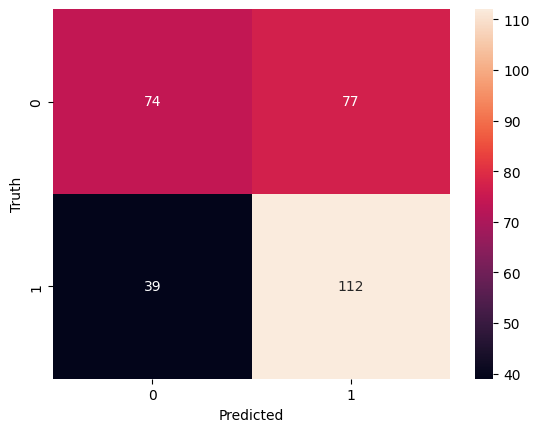

In [57]:
model_resample.evaluate(X_test, y_test)
y_predicted_re = model_resample.predict(X_test)
y_predicted_re = y_predicted_re.flatten()
y_predicted_re = np.where(y_predicted_re > 0.5, 1, 0)
cm = confusion_matrix(y_test, y_predicted_re)
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth') 
print(classification_report(y_test, y_predicted_re))
class_distribution = pd.value_counts(y)
print(class_distribution)

In [58]:
model_resample.save("model_final.h5")

In [ ]:
#### exploration de données ####
plt.pie(train_df["language"].value_counts(), labels=train_df["language"].unique())
plt.show()

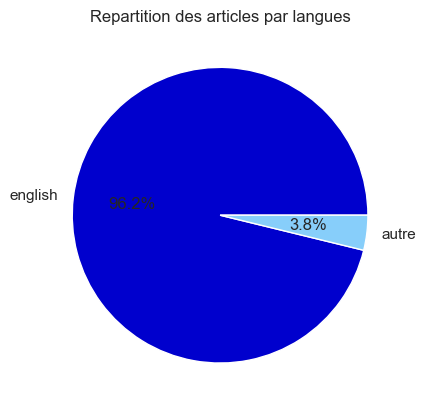

In [13]:
liste_langue = ['english', 'ignore', 'german', 'french', 'spanish']
nbre_obs_langue = []

for i in liste_langue:
   x=len(train_df[train_df["language"] == i])
   nbre_obs_langue.append(x)


liste_langues= pd.Series(nbre_obs_langue, index=liste_langue)

# Sélectionner la valeur pour "english" et la somme du reste
english_value = liste_langues['english']
autre_value = liste_langues.sum() - english_value

# Créer une nouvelle série avec "english" et "autre"
final_data = pd.Series([english_value, autre_value], index=['english', 'autre'])
sns.set_theme()
# Tracer le graphique en camembert
plt.pie(final_data, labels=final_data.index, autopct='%1.1f%%', colors= ['mediumblue', 'lightskyblue'])
plt.title("Repartition des articles par langues")
plt.show()

In [61]:
train_df["site_url"][train_df["language"] == "french"]

1499        presstv.com
1878    voltairenet.org
Name: site_url, dtype: object

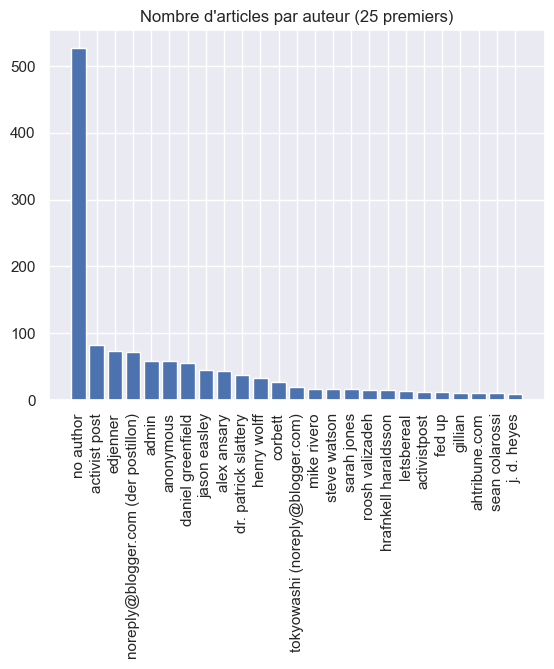

In [361]:
import seaborn as sns

train_df['author'] = train_df['author'].str.lower()
train_df.loc[train_df["author"] == "-NO AUTHOR-", "author"] = ""
articles_per_author = train_df["author"].value_counts().head(25)

visualisation_donnee = articles_per_author
sns.set_theme()
# Tracer le graphique à barres
plt.bar(visualisation_donnee.index, visualisation_donnee.values)
plt.title("Nombre d'articles par auteur (25 premiers)")
plt.xticks(rotation=90)  # Rotation des étiquettes de l'axe des x pour une meilleure lisibilité
#plt.yscale('log')
plt.show()


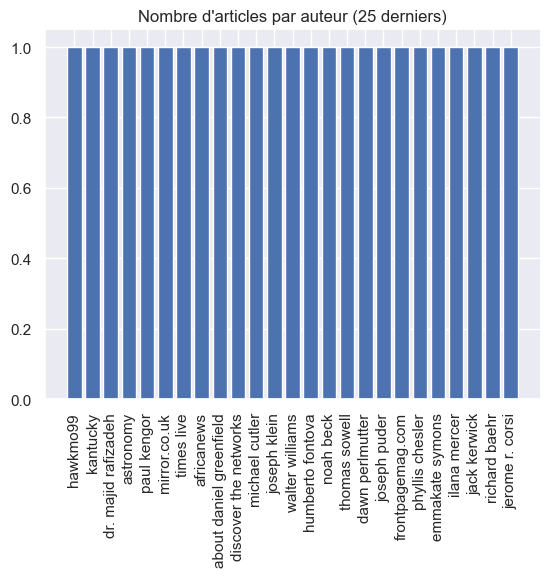

In [363]:
train_df['author'] = train_df['author'].str.lower()
train_df.loc[train_df["author"] == "-NO AUTHOR-", "author"] = ""
articles_per_author = train_df["author"].value_counts().tail(25)

visualisation_donnee = articles_per_author

sns.set_theme()
# Tracer le graphique à barres
plt.bar(visualisation_donnee.index, visualisation_donnee.values)
plt.title("Nombre d'articles par auteur (25 derniers)")
plt.xticks(rotation=90)  # Rotation des étiquettes de l'axe des x pour une meilleure lisibilité
#plt.yscale('log')
plt.show()

In [347]:
train_df["author"].value_counts()

author
No Author                              505
Activist Post                           82
EdJenner                                73
noreply@blogger.com (Der Postillon)     72
Anonymous                               58
                                      ... 
Phyllis Chesler                          1
Emma-Kate Symons                         1
Ilana Mercer                             1
Jack Kerwick                             1
Jerome R. Corsi                          1
Name: count, Length: 485, dtype: int64

In [364]:
train_df["author"].value_counts().sum()
train_df.columns

Index(['author', 'published', 'title', 'text', 'language', 'site_url',
       'main_img_url', 'type', 'label', 'title_without_stopwords',
       'text_without_stopwords', 'hasImage', 'summary'],
      dtype='object')